In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
cloth_categories = pd.read_csv('./Anno/Copy of list_category_cloth.txt', sep='\s{2,}', header=1)
image_categories = pd.read_csv('./Anno/Copy of list_category_img.txt', sep='\s+', header=1)

/Users/sarazylfo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


Detailed in the documentation of the csv, it states that 'the order of category labels accords with the order of category names'.

In [3]:
cloth_categories.head()

,category_name,category_type
0,Anorak,1
1,Blazer,1
2,Blouse,1
3,Bomber,1
4,Button-Down,1


In [4]:
# Adding a new column containing ordered category labels to correspond with image_category df
cloth_categories['category_label'] = np.arange(start=1, stop=51, step=1)

In [5]:
cloth_categories.head(2)

,category_name,category_type,category_label
0,Anorak,1,1
1,Blazer,1,2


In [6]:
image_categories.head()

,image_name,category_label
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,3
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,3
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,3
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,3
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,3


In [7]:
image_categories.category_label.value_counts().head(3)

41    72158
18    36887
3     24557
Name: category_label, dtype: int64

In [8]:
category = pd.merge(image_categories, cloth_categories, on='category_label')

In [9]:
category.head()

,image_name,category_label,category_name,category_type
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,3,Blouse,1
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,3,Blouse,1
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,3,Blouse,1
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,3,Blouse,1
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,3,Blouse,1


In [10]:
image_train_test = pd.read_csv('./Eval/list_eval_partition.txt', sep='\s+', header=1)

In [11]:
image_train_test.head()

,image_name,evaluation_status
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,train
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,train
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,val
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,train
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,test


In [12]:
categories_df = pd.merge(category, image_train_test, on='image_name')

In [13]:
categories_df.head()

,image_name,category_label,category_name,category_type,evaluation_status
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,3,Blouse,1,train
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,3,Blouse,1,train
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,3,Blouse,1,val
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,3,Blouse,1,train
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,3,Blouse,1,test


In [14]:
categories_df.category_name.unique()

array(['Blouse', 'Blazer', 'Button-Down', 'Bomber', 'Anorak', 'Tee',
       'Tank', 'Top', 'Sweater', 'Flannel', 'Hoodie', 'Cardigan',
       'Jacket', 'Henley', 'Poncho', 'Jersey', 'Turtleneck', 'Parka',
       'Peacoat', 'Halter', 'Skirt', 'Shorts', 'Jeans', 'Joggers',
       'Sweatpants', 'Jeggings', 'Cutoffs', 'Sweatshorts', 'Leggings',
       'Culottes', 'Chinos', 'Trunks', 'Sarong', 'Gauchos', 'Jodhpurs',
       'Capris', 'Dress', 'Romper', 'Coat', 'Kimono', 'Jumpsuit', 'Robe',
       'Caftan', 'Kaftan', 'Coverup', 'Onesie'], dtype=object)

In [15]:
categories_df.loc[categories_df['category_name']=='Caftan'].head()

,image_name,category_label,category_name,category_type,evaluation_status
288955,img/Tile_Print_Drawstring_Caftan/img_00000001.jpg,37,Caftan,3,train
288956,img/Tile_Print_Drawstring_Caftan/img_00000002.jpg,37,Caftan,3,train
288957,img/Tile_Print_Drawstring_Caftan/img_00000003.jpg,37,Caftan,3,train
288958,img/Tile_Print_Drawstring_Caftan/img_00000004.jpg,37,Caftan,3,train
288959,img/Tile_Print_Drawstring_Caftan/img_00000005.jpg,37,Caftan,3,train


In [16]:
categories_df.loc[categories_df['category_name']=='Kaftan'].head()

,image_name,category_label,category_name,category_type,evaluation_status
289009,img/Tribal_Print_V-Back_Kaftan/img_00000001.jpg,43,Kaftan,3,train
289010,img/Tribal_Print_V-Back_Kaftan/img_00000002.jpg,43,Kaftan,3,train
289011,img/Tribal_Print_V-Back_Kaftan/img_00000003.jpg,43,Kaftan,3,train
289012,img/Tribal_Print_V-Back_Kaftan/img_00000004.jpg,43,Kaftan,3,train
289013,img/Tribal_Print_V-Back_Kaftan/img_00000005.jpg,43,Kaftan,3,train


Caftan and Kaftan are essentially the same thing, so I will be combining them under Kaftan which is the more generally used spelling by high end fashion retailers 

In [17]:
categories_df.loc[categories_df['category_label']==37] = 43

In [18]:
sum(categories_df['category_label']==37)

0

In [19]:
categories_df.loc[categories_df['category_name']=='Caftan'] = 'Kaftan'

In [20]:
sum(categories_df['category_name']=='Caftan')

0

In [21]:
categories_df.shape

(289222, 5)

There are so many images, we need to cut this shit down

There is a massive class imbalance between categories

In [22]:
categories_df.category_name.value_counts().head(2)

Dress    72158
Tee      36887
Name: category_name, dtype: int64

It would be ideal to drop some of the categories that have comparitvely small classes and are not commonly stocked among high end fashion retailers. 

- Onesie's are not commonly sold by high end fashion retailers.
- I don't even know what a '43' is. 
- Halter is not a clothing category, it is a style.
- Gauchos are now commonly referred to as culottes, will combine in that category. 
- Jodhpurs orginially refer to a type of trouser, the name has now been repurposed for shoes cos they're hideous. 
- Flannel is a material not a category, can be put into button down.

In [23]:
df_2 = categories_df[categories_df != 'Onesie']

/Users/sarazylfo/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [24]:
sum(df_2['category_name']=='Onesie')

0

In [25]:
df_3 = df_2[df_2 != 'Halter']

In [26]:
sum(df_3['category_name']=='Halter')

0

In [27]:
df_4 = df_3[df_3 != 'Jodhpurs']

In [28]:
sum(df_4['category_name']=='Jodhpurs')

0

In [29]:
df_5 = df_4[df_4 != '43']

In [30]:
sum(df_5['category_name']=='43')

0

In [31]:
df_5.loc[df_5['category_name']=='Gauchos'] = 'Culottes'

In [32]:
sum(df_5['category_name']=='Gauchos')

0

In [33]:
df_5.loc[df_5['category_label']=='25'] = '23'

In [34]:
df_5.loc[df_5['category_name']=='Flannel'] = 'Button-Down'

In [35]:
df_5.loc[df_5['category_label']=='7'] = '5'

In [36]:
df_5.head()

,image_name,category_label,category_name,category_type,evaluation_status
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,3,Blouse,1,train
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,3,Blouse,1,train
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,3,Blouse,1,val
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,3,Blouse,1,train
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,3,Blouse,1,test


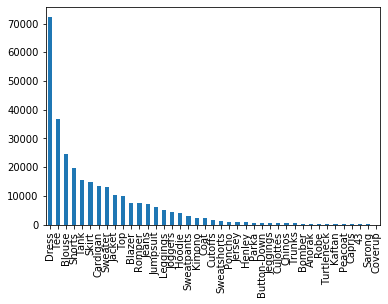

In [37]:
df_5.category_name.value_counts().plot(kind='bar')

In [38]:
top_10_dict = dict(df_5.category_name.value_counts().head(10))

In [39]:
top_10_dict

{'Dress': 72158,
 'Tee': 36887,
 'Blouse': 24557,
 'Shorts': 19666,
 'Tank': 15429,
 'Skirt': 14773,
 'Cardigan': 13311,
 'Sweater': 13123,
 'Jacket': 10467,
 'Top': 10078}

Create a training dataframe using only the largest classes. 

In [40]:
training = df_5[df_5['evaluation_status'].isin(['train', 'val'])][['image_name', 'category_name', 'category_label', 'evaluation_status']].copy()

In [41]:
training.head()

,image_name,category_name,category_label,evaluation_status
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,Blouse,3,train
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,Blouse,3,train
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,Blouse,3,val
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,Blouse,3,train
5,img/Sheer_Pleated-Front_Blouse/img_00000006.jpg,Blouse,3,val


In [42]:
top_10 = training[training['category_name'].isin(['Tee', 'Blouse', 'Shorts', 'Tank', 'Skirt', 'Cardigan', 'Jacket', 'Sweater', 'Top'])]

In [43]:
top_10.category_name.unique()

array(['Blouse', 'Tee', 'Tank', 'Top', 'Sweater', 'Cardigan', 'Jacket',
       'Skirt', 'Shorts'], dtype=object)

In [44]:
top_10.shape

(136434, 4)

In [45]:
top_10_training = top_10[top_10['evaluation_status'].isin(['train','val'])].copy()

In [46]:
top_10_training.shape

(136434, 4)

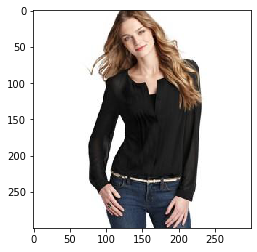

In [47]:
from matplotlib import image

data = image.imread('./img/Sheer_Pleated-Front_Blouse/img_00000001.jpg')
plt.imshow(data)
plt.show()

In [48]:
data.shape

(300, 300, 3)

In [49]:
df_5.category_name.value_counts().head(2)

Dress    72158
Tee      36887
Name: category_name, dtype: int64

Using small subsection of the image database to try first CNN due to sheer volume of images

In [50]:
shmall= training[training['category_name'].isin(['Sweatshorts', 'Coat ', 'Leggings'])]

In [73]:
shmall.to_csv('shmall.csv')

In [51]:
shmall.head()

,image_name,category_name,category_label,evaluation_status
190951,img/Mesh-Pocket_Sweatshorts/img_00000001.jpg,Sweatshorts,35,train
190952,img/Mesh-Pocket_Sweatshorts/img_00000002.jpg,Sweatshorts,35,train
190953,img/Mesh-Pocket_Sweatshorts/img_00000003.jpg,Sweatshorts,35,train
190954,img/Mesh-Pocket_Sweatshorts/img_00000004.jpg,Sweatshorts,35,train
190955,img/Mesh-Pocket_Sweatshorts/img_00000005.jpg,Sweatshorts,35,train


In [52]:
shmall.evaluation_status.unique()

array(['train', 'val'], dtype=object)

In [53]:
image_array = []

for img in shmall['image_name']:
    image_array.append(image.imread(img))

In [54]:
type(image_array)

list

In [55]:
len(image_array)

5235

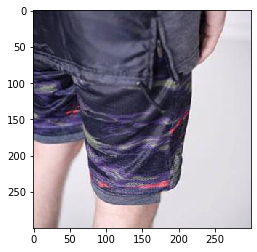

In [56]:
plt.imshow(image_array[10])

In [57]:
image_array = np.asarray(image_array)

In [58]:
image_array[0].shape

(300, 300, 3)

In [59]:
type(image_array)

numpy.ndarray

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X = image_array
y = shmall['category_label']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=420)

In [62]:
print(type(X_train))
print(type(y_train))
print(type(X_val))
print(type(y_val))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


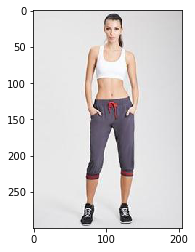

In [63]:
plt.imshow(X_train[10])

In [64]:
print(X_train[10].shape)

(300, 205, 3)


In [65]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_val_one_hot = to_categorical(y_val)

Using TensorFlow backend.


In [66]:
y_train_one_hot[10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0.], dtype=float32)

In [67]:
# Normalise the pixels in X_train data
X_train_norm = []

for a in X_train:
    X_train_norm.append(a/255)

In [68]:
# Normalise the pixels in X_val data
X_val_norm = []

for a in X_val:
    X_val_norm.append(a/255)

In [69]:
X_train_norm = np.asarray(X_train_norm)
X_val_norm = np.asarray(X_val_norm)

In [70]:
print(type(X_train_norm))
print(type(X_val_norm))
print(type(y_train_one_hot))
print(type(y_val_one_hot))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
df = pd.read_csv('clothing_attributes.csv')
df.head()

,Unnamed: 0,attribute_names,attribute_type
0,1,a-line,3
1,2,abstract,1
2,3,abstract chevron,1
3,4,abstract chevron print,1
4,5,abstract diamond,1
